In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import math 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids, AllKNN
from sklearn.metrics import classification_report, f1_score, roc_auc_score,accuracy_score,confusion_matrix
from imblearn.metrics import specificity_score

Dane z https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome/data

In [6]:
df = pd.read_csv("./income.csv")

In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


In [9]:
df.shape

(25000, 15)

In [10]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,25000.00000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.60916,1.896611e+05,10.076320,1083.144040,87.489800,40.442800
std,13.68660,1.054713e+05,2.576967,7321.971568,402.830246,12.309706
min,17.00000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.00000,1.179830e+05,9.000000,0.000000,0.000000,40.000000
50%,37.00000,1.782110e+05,10.000000,0.000000,0.000000,40.000000
75%,48.00000,2.370682e+05,12.000000,0.000000,0.000000,45.000000
max,90.00000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.replace("?", np.nan, inplace=True)
df.isna().sum()

age                  0
workclass         1429
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1434
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     437
income               0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K


- **age**: Wiek osoby.
- **workclass**: Ogólny termin wskazujący status zatrudnienia osoby.
- **fnlwgt**: Waga końcowa, reprezentująca liczbę osób, którą ta dana reprezentuje (próbka reprezentatywna).
- **education**: Najwyższy poziom wykształcenia osiągnięty przez osobę.
- **education.num**: Najwyższy poziom wykształcenia osiągnięty przez osobę w formie numerycznej.
- **marital.status**: Status cywilny osoby. Zwróć uwagę, że "Married-civ-spouse" oznacza cywilnego małżonka, a "Married-AF-spouse" odnosi się do małżonka w Siłach Zbrojnych.
- **occupation**: Ogólny typ zawodu osoby.
- **relationship**: Relacja tej osoby z innymi, na przykład małżonek (mąż). Każdy punkt danych ma tylko jedną relację.
- **race**: Rasa.
- **sex**: Płeć biologiczna osoby.
- **capital.gain**: Zyski kapitałowe osoby.
- **capital.loss**: Straty kapitałowe osoby.
- **hours.per.week**: Liczba godzin, które osoba zadeklarowała jako przepracowane w tygodniu.
- **native.country**: Kraj pochodzenia.
- **income**: Dochód, mniejszy lub równy $50,000 (`<=50K`) lub większy (`>50K`).


In [15]:
def categorical_value_counts(data):
    categorical_cols = data.select_dtypes(include=['object']).columns 
    value_counts = {col: data[col].value_counts() for col in categorical_cols}
    return value_counts 

In [16]:
# Załóżmy, że masz DataFrame o nazwie data
value_counts = categorical_value_counts(df)

# Wyświetlenie wyników
for col, counts in value_counts.items():
    print(f"\nColumn: {col}")
    print(counts)



Column: workclass
workclass
Private             17157
Self-emp-not-inc     1908
Local-gov            1535
State-gov             992
Self-emp-inc          820
Federal-gov           725
Without-pay            12
Name: count, dtype: int64

Column: education
education
HS-grad         7520
Some-college    5144
Bachelors       3873
Masters         1231
Assoc-voc       1008
11th             805
Assoc-acdm       760
10th             647
Prof-school      420
7th-8th          410
9th              351
Doctorate        301
12th             298
5th-6th          228
1st-4th          121
Preschool         32
Name: count, dtype: int64

Column: marital.status
marital.status
Married-civ-spouse       10830
Never-married             7451
Divorced                  3214
Separated                  718
Widowed                    642
Married-spouse-absent      277
Married-AF-spouse           17
Name: count, dtype: int64

Column: occupation
occupation
Prof-specialty       3119
Craft-repair         3083
Exec-ma

In [17]:
# Funkcja do obliczania V-Cramera
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

def cramers_v_output(v_cramer, variable1, variable2):
    print(f"V-Cramer dla zmiennych {variable1} & {variable2}: {v_cramer}")

    # Interpretacja wyniku
    if v_cramer < 0.1:
        print("Bardzo słaba zależność")
    elif v_cramer < 0.3:
        print("Słaba zależność")
    elif v_cramer < 0.5:
        print("Umiarkowana zależność")
    else:
        print("Silna zależność")

In [18]:
# Utworzenie macierzy contingency
contingency_table = pd.crosstab(df['relationship'], df['marital.status'])
# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'relationship', 'marital.status')

V-Cramer dla zmiennych relationship & marital.status: 0.4883047419738085
Umiarkowana zależność


In [19]:
contingency_table = pd.crosstab(df['workclass'], df['occupation'])
# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'workclass', 'occupation')


V-Cramer dla zmiennych workclass & occupation: 0.21386591543583022
Słaba zależność


In [20]:
# Utworzenie macierzy contingency
contingency_table = pd.crosstab(df['race'], df['native.country'])

# Obliczenie V-Cramera
v_cramer = cramers_v(contingency_table)
cramers_v_output(v_cramer, 'race', 'native.country')


V-Cramer dla zmiennych race & native.country: 0.42552233243500237
Umiarkowana zależność


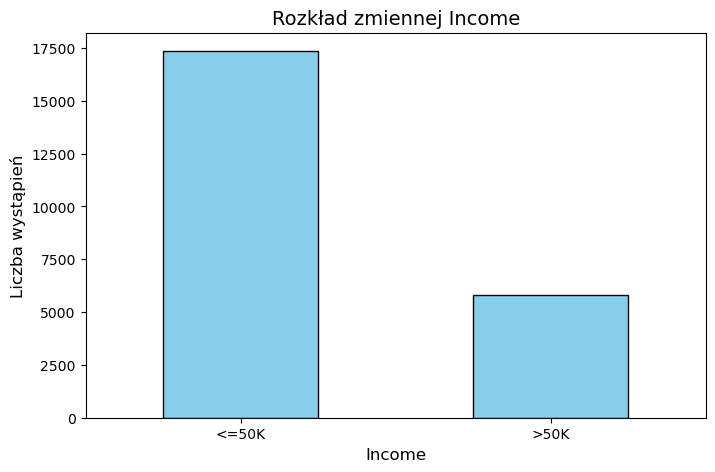

In [21]:
plt.figure(figsize=(8, 5))
df['income'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Rozkład zmiennej Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Liczba wystąpień', fontsize=12)
plt.xticks(rotation=0)  # Ustawienie etykiet osi X poziomo

# Wyświetlenie wykresu
plt.show()


In [22]:
print(f"Klasa pozytywna to: {df['income'].value_counts()[1] / (df['income'].value_counts()[0] + df['income'].value_counts()[1]) * 100}% zbioru danych.")

Klasa pozytywna to: 25.01187956283209% zbioru danych.


/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_66983/1374892314.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Klasa pozytywna to: {df['income'].value_counts()[1] / (df['income'].value_counts()[0] + df['income'].value_counts()[1]) * 100}% zbioru danych.")
/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_66983/1374892314.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Klasa pozytywna to: {df['income'].value_counts()[1] / (df['income'].value_counts()[0] + df['income'].value_counts()[1]) * 100}% zbioru danych.")
/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_669

In [23]:
# Utworzenie nowej zmiennej jako różnicy między capital.gain i capital.loss
df['net.capital'] = df['capital.gain'] - df['capital.loss']

# Sprawdzenie statystyk nowej zmiennej
print(df['net.capital'].describe())

# Podgląd wartości
print(df[['capital.gain', 'capital.loss', 'net.capital']].head())

count    23149.000000
mean      1005.553458
std       7347.306965
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: net.capital, dtype: float64
   capital.gain  capital.loss  net.capital
0         99999             0        99999
1             0             0            0
2             0             0            0
3             0             0            0
5             0             0            0


In [24]:
print((df['net.capital'] == 0).sum())

20074


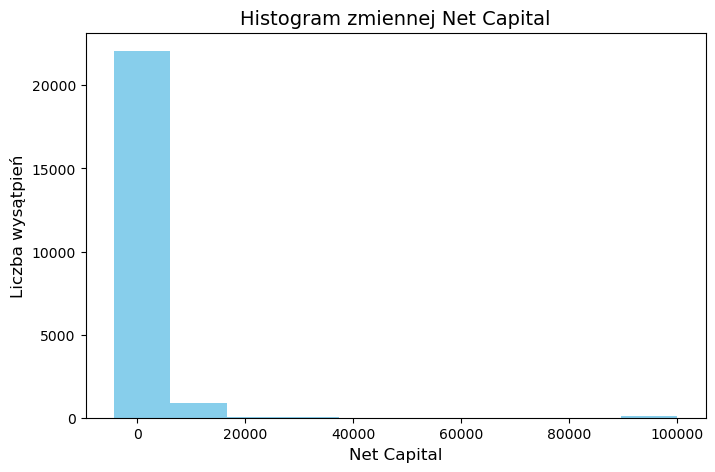

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(df['net.capital'], color='skyblue')

plt.title("Histogram zmiennej Net Capital", fontsize=14)
plt.xlabel("Net Capital", fontsize=12)
plt.ylabel("Liczba wysątpień", fontsize=12)

plt.show()

In [26]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,net.capital
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K,99999
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K,0
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K,0
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K,0


In [27]:
df = df.drop(columns=['education', 'relationship', 'capital.loss', 'capital.gain'])

In [28]:
region_mapping = {
    'Cambodia': 'Asia',
    'Canada': 'North America',
    'China': 'Asia',
    'Columbia': 'South America',
    'Cuba': 'Caribbean',
    'Dominican-Republic': 'Caribbean',
    'Ecuador': 'South America',
    'El-Salvador': 'Central America',
    'England': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Guatemala': 'Central America',
    'Haiti': 'Caribbean',
    'Honduras': 'Central America',
    'Hong': 'Asia',
    'Hungary': 'Europe',
    'India': 'Asia',
    'Iran': 'Middle East',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Jamaica': 'Caribbean',
    'Japan': 'Asia',
    'Laos': 'Asia',
    'Mexico': 'North America',
    'Nicaragua': 'Central America',
    'Outlying-US(Guam-USVI-etc)': 'US Territories',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Puerto-Rico': 'Caribbean',
    'Scotland': 'Europe',
    'South': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Trinadad&Tobago': 'Caribbean',
    'United-States': 'North America',
    'Vietnam': 'Asia',
    'Yugoslavia': 'Europe'
}

# Dodanie kolumny native.region na podstawie mapowania
df['native.region'] = df['native.country'].replace(region_mapping)

df = df.drop(columns=['native.country'])
# Sprawdzenie wyników
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,hours.per.week,income,net.capital,native.region
0,40,Self-emp-not-inc,223881,15,Married-civ-spouse,Prof-specialty,White,Male,70,>50K,99999,North America
1,30,Private,149118,9,Divorced,Craft-repair,White,Female,40,<=50K,0,North America
2,46,Private,109209,10,Married-civ-spouse,Adm-clerical,White,Male,40,>50K,0,North America
3,32,Private,229566,11,Married-civ-spouse,Other-service,White,Male,60,>50K,0,North America
5,63,Private,111963,10,Married-civ-spouse,Prof-specialty,White,Male,16,<=50K,0,North America


In [29]:



def plot_confusion_matrix(y_true, y_pred, labels, cmap, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_with_labels = pd.DataFrame(conf_matrix, columns=labels, index=labels)
    sns.heatmap(conf_matrix_with_labels, annot=True, fmt='d', cmap=cmap)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [30]:



def evaluate_model(model, X_train, y_train, X_test, y_test, labels=('neg', 'pos'), cmap='Blues'):
    """
    Funkcja do obliczania i wyświetlania metryk modelu, wizualizacji macierzy konfuzji
    oraz wyświetlania raportu klasyfikacji.

    Parametry:
    - model: sklearn-like model
        Wytrenowany model predykcyjny.
    - X_train, Y_train: array-like
        Dane treningowe i ich etykiety.
    - X_test, Y_test: array-like
        Dane testowe i ich etykiety.
    - labels: tuple, optional
        Etykiety dla osi macierzy konfuzji (domyślnie ('neg', 'pos')).
    - cmap: str, optional
        Kolorystyka mapy cieplnej (domyślnie 'Blues').

    Returns:
    - None
    """

    # Metryki dla danych treningowych
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    print('Metryki dla danych treningowych:')
    print(f'Accuracy: {acc_train:.4f}')
    print(f'AUC: {auc_train:.4f}')
    print(f'F1: {f1_train:.4f}')
    print('\nClassification Report dla danych treningowych:')
    print(classification_report(y_train, y_pred_train))

    # Wizualizacja macierzy konfuzji dla danych treningowych
    plot_confusion_matrix(y_train, y_pred_train, labels, cmap, 'Confusion Matrix (Train)')

    # Metryki dla danych testowych
    y_pred_test = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    auc_test = roc_auc_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    print('\nMetryki dla danych testowych:')
    print(f'Accuracy: {acc_test:.4f}')
    print(f'AUC: {auc_test:.4f}')
    print(f'F1: {f1_test:.4f}')
    print('\nClassification Report dla danych testowych:')
    print(classification_report(y_test, y_pred_test))

    # Wizualizacja macierzy konfuzji dla danych testowych
    plot_confusion_matrix(y_test, y_pred_test, labels, cmap, 'Confusion Matrix (Test)')


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Przygotowanie podstawowych DataFrame'ów
df_occupation_race = df.drop(columns=['workclass', 'native.region'])
df_occupation_native_region = df.drop(columns=['workclass', 'race'])
df_workclass_race = df.drop(columns=['occupation', 'native.region'])
df_workclass_native_region = df.drop(columns=['occupation', 'race'])

# Lista podzbiorów danych
dataframes = {
    'df_occupation_race': df_occupation_race,
    'df_occupation_native_region': df_occupation_native_region,
    'df_workclass_race': df_workclass_race,
    'df_workclass_native_region': df_workclass_native_region
}

# Wynikowy słownik na metryki
results = {}

# Pętla dla każdej kombinacji
for name, subset in dataframes.items():
    print(f'\nPrzetwarzanie {name}')
    
    # Konwersja do zmiennych dummy 
    columns = subset.columns.drop(['education.num', 'hours.per.week', 'net.capital','fnlwgt', 'age'])
    subset_dummies = pd.get_dummies(subset,columns=columns, drop_first=True, dtype=int)
    
    # Podział na cechy (X) i etykiety (Y)
    X = subset_dummies.drop(columns=['income_>50K'])
    Y = subset_dummies['income_>50K']
    
    # Podział na zbiory treningowy i testowy
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Trenowanie modelu
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, Y_train)
    
    # Predykcje
    Y_pred = model.predict(X_test)
    
    # Obliczanie dokładności
    accuracy = accuracy_score(Y_test, Y_pred)
    
    # Zapisywanie wyniku
    results[name] = accuracy
    print(f'Acuracy: {accuracy:.4f}')

# Wyświetlanie najlepszego modelu
best_model = max(results, key=results.get)
print(f'\nNajlepszy podzbiór danych: {best_model} z dokładnością {results[best_model]:.4f}')




Przetwarzanie df_occupation_race
Acuracy: 0.8525

Przetwarzanie df_occupation_native_region
Acuracy: 0.8475

Przetwarzanie df_workclass_race
Acuracy: 0.8376

Przetwarzanie df_workclass_native_region
Acuracy: 0.8434

Najlepszy podzbiór danych: df_occupation_race z dokładnością 0.8525


In [32]:
#select best df as df
df = dataframes[best_model]
df.head()

,age,fnlwgt,education.num,marital.status,occupation,race,sex,hours.per.week,income,net.capital
0,40,223881,15,Married-civ-spouse,Prof-specialty,White,Male,70,>50K,99999
1,30,149118,9,Divorced,Craft-repair,White,Female,40,<=50K,0
2,46,109209,10,Married-civ-spouse,Adm-clerical,White,Male,40,>50K,0
3,32,229566,11,Married-civ-spouse,Other-service,White,Male,60,>50K,0
5,63,111963,10,Married-civ-spouse,Prof-specialty,White,Male,16,<=50K,0


In [33]:
columns = df.columns.drop(['education.num', 'hours.per.week', 'net.capital','fnlwgt', 'age'])
df = pd.get_dummies(df,columns=columns, drop_first=True, dtype=int)
df.head()

,age,fnlwgt,education.num,hours.per.week,net.capital,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income_>50K
0,40,223881,15,70,99999,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,30,149118,9,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,46,109209,10,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,32,229566,11,60,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
5,63,111963,10,16,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23149 entries, 0 to 24999
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   23149 non-null  int64
 1   fnlwgt                                23149 non-null  int64
 2   education.num                         23149 non-null  int64
 3   hours.per.week                        23149 non-null  int64
 4   net.capital                           23149 non-null  int64
 5   marital.status_Married-AF-spouse      23149 non-null  int64
 6   marital.status_Married-civ-spouse     23149 non-null  int64
 7   marital.status_Married-spouse-absent  23149 non-null  int64
 8   marital.status_Never-married          23149 non-null  int64
 9   marital.status_Separated              23149 non-null  int64
 10  marital.status_Widowed                23149 non-null  int64
 11  occupation_Armed-Forces               23149 no

In [35]:
df['income_>50K'].value_counts()

income_>50K
0    17359
1     5790
Name: count, dtype: int64

In [36]:
X = df.drop(columns=['income_>50K'])
y = df['income_>50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
from sklearn.metrics import precision_score, recall_score


methods = [SMOTE(), ADASYN(), BorderlineSMOTE(), SVMSMOTE(), RandomOverSampler()]
results_oversampling = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'Specificity'])

for method in methods:
    X_resampled, y_resampled = method.fit_resample(X_train, y_train)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_test_pred = model.predict(X_test)
    
    # Dodanie nowego wiersza jako DataFrame
    new_row = pd.DataFrame({
        'Method': [str(method)],
        'Accuracy': [accuracy_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_test, y_test_pred, zero_division=0)],
        'Recall': [recall_score(y_test, y_test_pred, zero_division=0)],
        'Specificity': [specificity_score(y_test, y_test_pred)]
    })
    
    # Połączenie wyników
    results_oversampling = pd.concat([results_oversampling, new_row], ignore_index=True)

results_oversampling


/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_63913/854401252.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_oversampling = pd.concat([results_oversampling, new_row], ignore_index=True)


,Method,Accuracy,Precision,Recall,Specificity
0,SMOTE(),0.832397,0.653208,0.687427,0.880046
1,ADASYN(),0.828942,0.643865,0.690338,0.874498
2,BorderlineSMOTE(),0.831677,0.648138,0.699069,0.875263
3,SVMSMOTE(),0.836141,0.660044,0.696158,0.882150
4,RandomOverSampler(),0.848812,0.692175,0.700233,0.897647


In [138]:
methods = [RandomUnderSampler(), NearMiss(), TomekLinks(), ClusterCentroids(), AllKNN()]
results_undersampling = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'Specificity'])

for method in methods:
    X_resampled, y_resampled = method.fit_resample(X_train, y_train)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_test_pred = model.predict(X_test)
    
    new_row = pd.DataFrame({
        'Method': [str(method)],
        'Accuracy': [accuracy_score(y_test, y_test_pred)],
        'Precision': [precision_score(y_test, y_test_pred, zero_division=0)],
        'Recall': [recall_score(y_test, y_test_pred, zero_division=0)],
        'Specificity': [specificity_score(y_test, y_test_pred)]
    })
    
    # Połączenie wyników
    results_undersampling = pd.concat([results_undersampling, new_row], ignore_index=True)

results_undersampling

/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_63913/3056045029.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_undersampling = pd.concat([results_undersampling, new_row], ignore_index=True)


,Method,Accuracy,Precision,Recall,Specificity
0,RandomUnderSampler(),0.814543,0.587327,0.841676,0.805625
1,NearMiss(),0.762131,0.511931,0.824214,0.741726
2,TomekLinks(),0.850396,0.713120,0.661234,0.912569
3,ClusterCentroids(),0.714615,0.462091,0.936554,0.641668
4,AllKNN(),0.818719,0.597618,0.817811,0.819017


Metryki dla danych treningowych:
Accuracy: 1.0000
AUC: 1.0000
F1: 1.0000

Classification Report dla danych treningowych:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10733
           1       1.00      1.00      1.00     10733

    accuracy                           1.00     21466
   macro avg       1.00      1.00      1.00     21466
weighted avg       1.00      1.00      1.00     21466



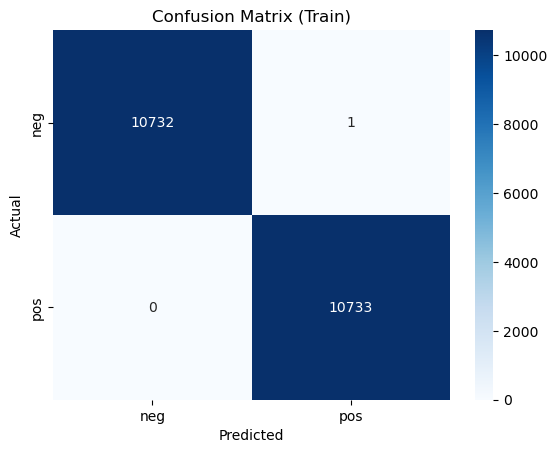


Metryki dla danych testowych:
Accuracy: 0.8397
AUC: 0.8011
F1: 0.6911

Classification Report dla danych testowych:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      5227
           1       0.66      0.72      0.69      1718

    accuracy                           0.84      6945
   macro avg       0.78      0.80      0.79      6945
weighted avg       0.85      0.84      0.84      6945



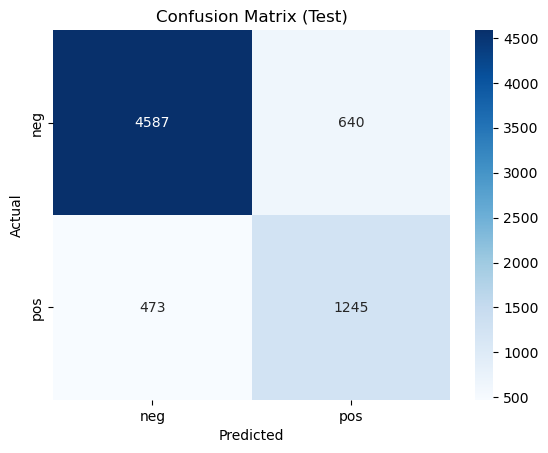

In [38]:

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

random_over_sampler = RandomOverSampler()
X_resampled, y_resampled = random_over_sampler.fit_resample(X_resampled, y_resampled)

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
evaluate_model(model, X_resampled, y_resampled, X_test, y_test)

### SVM

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
grid.best_params_


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   2.8s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   2.9s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   3.3s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   3.5s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   4.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   6.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   6.6s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   6.8s
[CV] END .........C=0.1, degree=2, gamma=auto, kernel=linear; total time=   5.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   9.1s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   9.6s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   8.6s
[CV] END ...........C=0.1, d

{'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [44]:
# #find best params using optuna
# import optuna
# from sklearn.model_selection import cross_val_score
# # find best params for svc model using optuna
# def objective(trial):
#     C = trial.suggest_loguniform('C', 1e-10, 1e10)
#     kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
#     degree = trial.suggest_int('degree', 2, 5)
#     gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
#     model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
#     score = cross_val_score(model, X_train_scaled, y_train, n_jobs=-1, cv=5).mean()
#     return score
# # create study object
# study = optuna.create_study(direction='maximize')
# # optimize the objective function
# study.optimize(objective, n_trials=100)
# # get best params
# best_params = study.best_params

[I 2025-01-01 16:55:09,458] A new study created in memory with name: no-name-77e2a527-72b0-4c34-bf89-3f95af75f434
/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_66983/631451903.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e10)
[W 2025-01-01 17:11:31,562] Trial 0 failed with parameters: {'C': 11648696.282830592, 'kernel': 'linear', 'degree': 5, 'gamma': 'auto'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/hh/pvrf3bcn1_19pfvwcv0z6n_m0000gn/T/ipykernel_66983/631451903.py", line 11, in objective
    score = cross_val_score(model, X_train_sc

KeyboardInterrupt: 

KNN i KKNN

In [45]:
#grid search for knn
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
grid.best_params_


Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.3s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.2s
[CV] END ...metric=euclidean, n_neighbors=5, we

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

Metryki dla danych treningowych:
Accuracy: 0.8492
AUC: 0.7666
F1: 0.6668

Classification Report dla danych treningowych:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12132
           1       0.75      0.60      0.67      4072

    accuracy                           0.85     16204
   macro avg       0.81      0.77      0.78     16204
weighted avg       0.84      0.85      0.84     16204



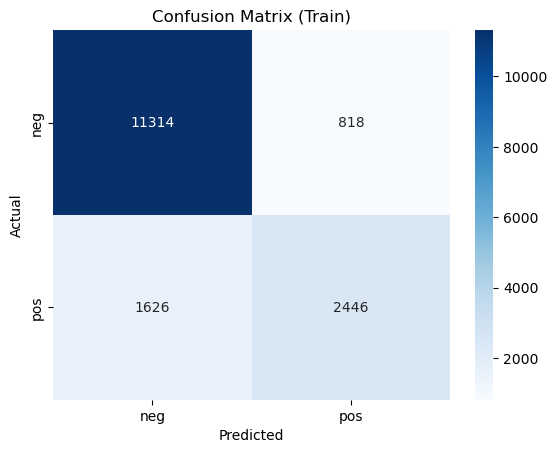


Metryki dla danych testowych:
Accuracy: 0.8369
AUC: 0.7429
F1: 0.6282

Classification Report dla danych testowych:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      5227
           1       0.72      0.56      0.63      1718

    accuracy                           0.84      6945
   macro avg       0.79      0.74      0.76      6945
weighted avg       0.83      0.84      0.83      6945



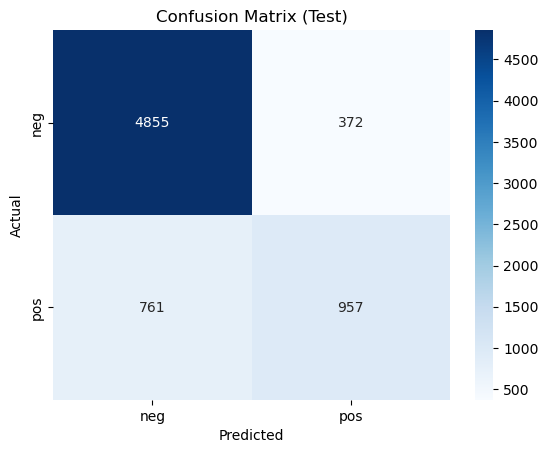

In [46]:
evaluate_model(grid.best_estimator_, X_train_scaled, y_train, scaler.transform(X_test), y_test)